In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing

In [3]:
prices = pd.read_csv("gld_price_data.csv")

In [4]:
prices.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
prices.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
prices.shape

(2290, 6)

In [9]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
prices.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

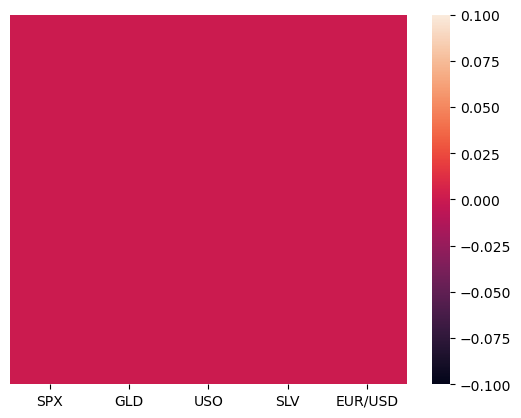

In [22]:
sns.heatmap(prices.drop('Date', axis = 1).isnull(), yticklabels=False)

In [27]:
prices.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

#### Correlation

In [33]:
corr = prices.corr()
corr

/var/folders/5_/mmhbpf7n3d92k9rw8bgx8p6w0000gn/T/ipykernel_40244/2219749957.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = prices.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

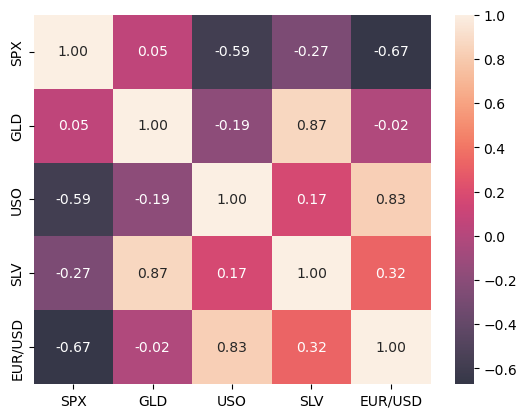

In [56]:
sns.heatmap(corr, annot=True,fmt='.2f', alpha = 0.8)

In [57]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


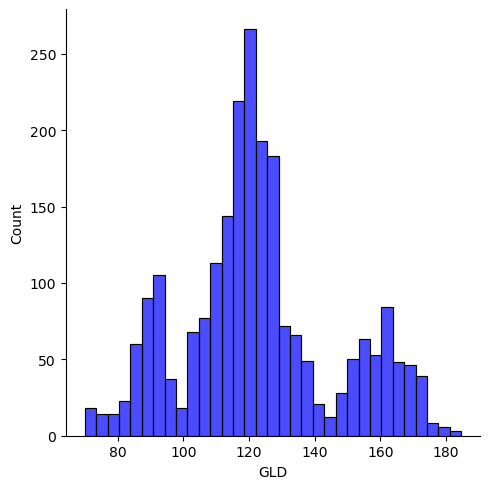

In [63]:
sns.displot(prices['GLD'], color = "Blue", alpha = 0.7)

In [68]:
X = prices.drop(['GLD', 'Date'], axis = 1)
y = prices['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
rnd = RandomForestRegressor(n_estimators=100)

In [70]:
rnd.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
prediction = rnd.predict(X_test)

In [82]:
print(prediction[:50])

[ 91.03759935 166.56769878 114.07190002 169.9348008  125.90070186
  89.12560026  85.35649813 131.96519851 125.31109982 127.88199912
 178.01049784 167.32569935 107.299299   105.62770176 117.73300071
 125.82909906  83.74329887 123.95540092 167.11659912  87.76539958
 117.22520009 127.25760153 164.42249904 157.46220134  90.23179938
 134.35280427 115.53259992 109.20970048 111.09230085 168.36219988
 157.35650299 125.91670078 171.38810185 154.48570121 157.80550197
 134.67329941 135.28460161 151.93100098 111.12249952 176.72400202
 125.7894002  148.51900071 137.41410099 126.59870001  91.0253998
 122.39069973 119.95890078 116.35790102  86.65199788 114.68510125]


### Comparision

In [83]:
error_score = metrics.r2_score(y_test, prediction)

In [84]:
error_score

0.9921142110716055

In [86]:
y_test = list(y_test)

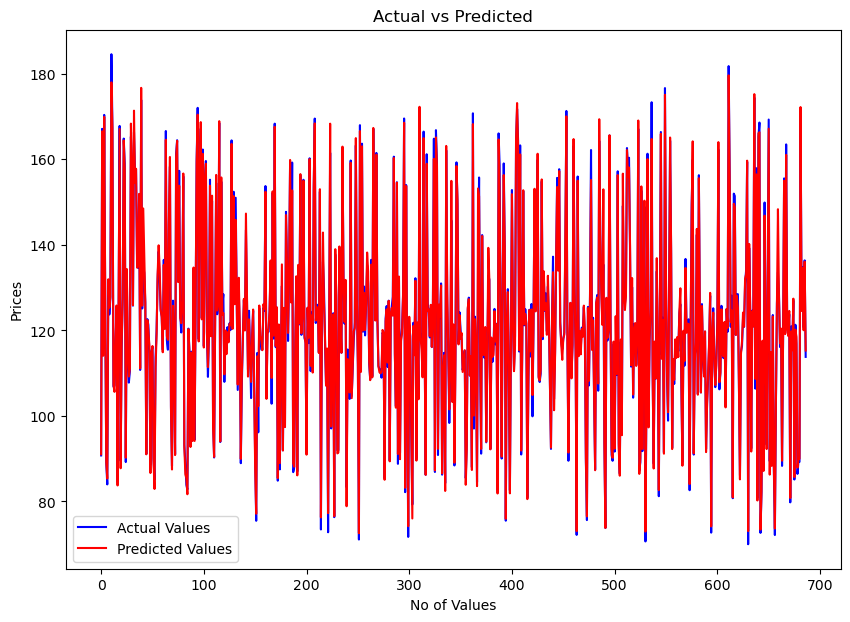

In [99]:
plt.figure(figsize=(10,7))
plt.plot(y_test, color = 'blue', label = 'Actual Values')
plt.plot(prediction, color = 'red', label = 'Predicted Values')
plt.ylabel("Prices")
plt.xlabel("No of Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()